In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [2]:
personality_df = pd.read_csv("personality.csv")

In [3]:
personality_df.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [15]:
personality_df.shape

(140, 8)

In [16]:
personality_df = personality_df.iloc[:,1:]

In [17]:
personality_df.head()

,op,co,ex,ag,ne,wordcount,categoria
0,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [18]:
personality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   op         140 non-null    float64
 1   co         140 non-null    float64
 2   ex         140 non-null    float64
 3   ag         140 non-null    float64
 4   ne         140 non-null    float64
 5   wordcount  140 non-null    float64
 6   categoria  140 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 7.8 KB


In [19]:
personality_df.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [25]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(personality_df)
df_scale = pd.DataFrame(scale, columns=personality_df.columns)
df_scale.head()

,op,co,ex,ag,ne,wordcount,categoria
0,0.102638,0.485725,0.565391,0.641501,0.383967,0.151175,0.750
1,0.359116,0.303292,0.467902,0.478723,0.406663,0.347735,0.750
2,0.281061,0.141023,0.493696,0.810161,0.340190,0.208518,0.375
3,0.248507,0.180081,0.817966,0.696232,0.174393,0.355544,0.125
4,0.159427,0.282146,0.725415,0.698045,0.273474,0.198168,0.375


In [26]:
pca = PCA()

In [33]:
pca.fit(df_scale)

PCA()

In [34]:
pca_summery_df = pd.DataFrame({"Proporción de la varianza":pca.explained_variance_ratio_, "Proporción acumulada": np.cumsum(pca.explained_variance_ratio_)})

In [35]:
pca_summery_df

,Proporción de la varianza,Proporción acumulada
0,0.459838,0.459838
1,0.252489,0.712327
2,0.104511,0.816838
3,0.064297,0.881134
4,0.052139,0.933274
5,0.038691,0.971965
6,0.028035,1.000000


In [37]:
pca_summery_df = pca_summery_df.transpose()

In [38]:
pca_components_df = pd.DataFrame(pca.components_.transpose(), columns=pca_summery_df.columns, index=personality_df.columns)

In [39]:
pca_components_df

,0,1,2,3,4,5,6
op,-0.423665,0.161258,0.297915,-0.122392,0.555228,0.183663,-0.590559
co,-0.084508,0.283395,-0.046147,0.273515,-0.313708,-0.723723,-0.461972
ex,0.224236,-0.301010,-0.144342,-0.758990,-0.278475,-0.027230,-0.428860
ag,0.437575,-0.500320,-0.323078,0.399572,0.444152,-0.075088,-0.302095
ne,0.089161,0.173650,-0.136090,0.357410,-0.471680,0.659595,-0.397600
wordcount,-0.205198,0.384498,-0.855356,-0.166670,0.212929,0.032031,0.065398
categoria,0.722189,0.612179,0.183706,-0.137715,0.225096,0.004676,-0.016636


In [41]:
pca = PCA(n_components=2)

In [42]:
principal_components = pca.fit_transform(df_scale)

In [43]:
df_pca = pd.DataFrame(data = principal_components, columns=["PC1", "PC2"])
df_pca

,PC1,PC2
0,0.522163,0.012059
1,0.297521,0.192021
2,0.246935,-0.334779
3,0.054788,-0.494872
4,0.285618,-0.343622
...,...,...
135,0.535406,-0.000808
136,0.484158,-0.499145
137,-0.561505,-0.044943
138,-0.398081,-0.124593


<Axes: xlabel='PC1', ylabel='PC2'>

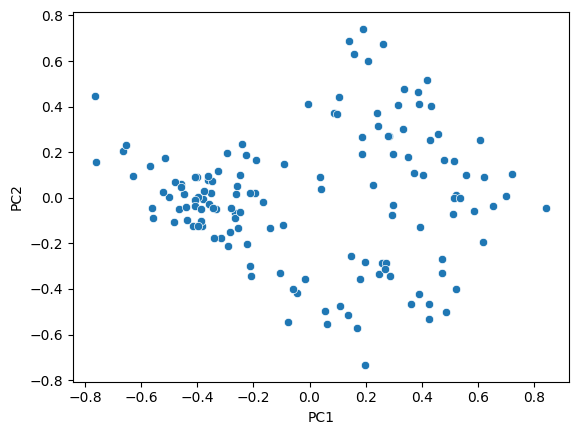

In [47]:
sns.scatterplot(y='PC2', x='PC1', data=df_pca)

In [72]:
K = range(2, 12)

inertias = []

for i in K:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_pca)
    inertias.append(kmeans.inertia_)

c:\Users\idg20\Documents\Semestre 7 Concentración IA\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\idg20\Documents\Semestre 7 Concentración IA\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\idg20\Documents\Semestre 7 Concentración IA\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\idg20\Documents\Semestre 7 Concentración IA\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

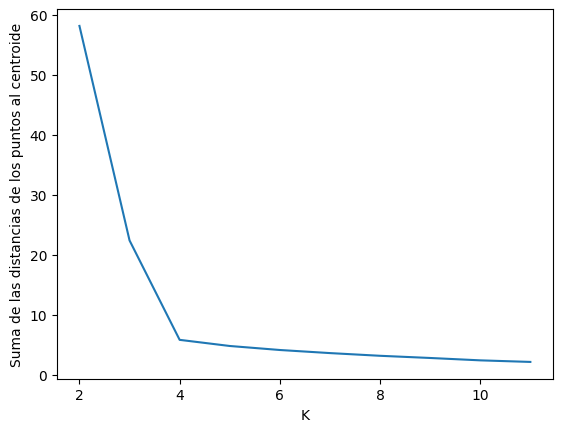

In [73]:
plt.plot(K, inertias)
plt.xlabel("K")
plt.ylabel("Suma de las distancias de los puntos al centroide")
plt.show()

In [74]:
km = KMeans(n_clusters=4)
km.fit_predict(df_pca)

c:\Users\idg20\Documents\Semestre 7 Concentración IA\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 2, 3, 3, 3, 0, 0, 3, 2, 2, 1, 1, 1, 1, 2, 1, 3, 2, 1, 3, 3, 1,
       1, 0, 1, 1, 0, 3, 3, 1, 2, 1, 1, 2, 3, 3, 3, 3, 3, 1, 0, 3, 0, 1,
       1, 1, 2, 1, 3, 0, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 0,
       1, 1, 1, 3, 0, 2, 2, 1, 2, 1, 2, 3, 3, 0, 3, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 3, 2, 1, 1, 1, 3, 1, 1, 3, 0, 2, 2,
       2, 0, 0, 0, 2, 1, 2, 1, 3, 0, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 0, 3, 1, 1, 3])

In [75]:
df_pca["Clusters"] = km.labels_
df_pca.head()

,PC1,PC2,Clusters
0,0.522163,0.012059,0
1,0.297521,0.192021,2
2,0.246935,-0.334779,3
3,0.054788,-0.494872,3
4,0.285618,-0.343622,3


<Axes: xlabel='PC1', ylabel='PC2'>

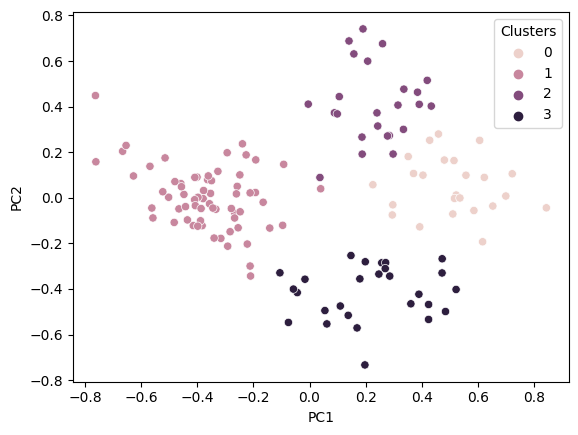

In [76]:
sns.scatterplot(y='PC2', x='PC1', hue="Clusters", data=df_pca)

In [77]:
personality_df.head()

,op,co,ex,ag,ne,wordcount,categoria,Clusters
0,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7,1
1,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7,3
2,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4,2
3,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2,2
4,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4,2


In [62]:
personality_df.groupby("Clusters").count()

,op,co,ex,ag,ne,wordcount,categoria
Clusters,,,,,,,
0,65,65,65,65,65,65,65
1,24,24,24,24,24,24,24
2,27,27,27,27,27,27,27
3,24,24,24,24,24,24,24


In [63]:
personality_df[personality_df["Clusters"] == 0]

,op,co,ex,ag,ne,wordcount,categoria,Clusters
10,52.750992,24.706565,41.698855,17.057176,8.279847,97.2901,3,0
11,41.328182,20.241212,39.173333,21.070505,7.823535,32.8788,1,0
12,54.407727,26.992121,34.104318,18.771818,8.867197,125.3409,1,0
13,47.610076,20.343788,39.439545,21.438409,8.865303,128.8561,2,0
15,48.617348,21.165758,43.617955,19.263258,5.176515,58.5833,3,0
...,...,...,...,...,...,...,...,...
131,58.380294,14.590784,45.653922,12.822843,4.094706,127.2059,1,0
132,40.345769,27.483615,37.003923,17.285538,11.544615,114.7077,1,0
134,57.962308,20.413308,33.373538,17.684000,5.751154,110.0231,3,0
137,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,2,0


In [78]:
df_name = pd.read_csv("personality.csv")
df_name.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [79]:
df_name["Clusters"] = km.labels_
df_name.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria,Clusters
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7,0
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7,2
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4,3
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2,3
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4,3


In [84]:
df_name[df_name["Clusters"] == 1]

,usuario,op,co,ex,ag,ne,wordcount,categoria,Clusters
10,AngelAlessandra,52.750992,24.706565,41.698855,17.057176,8.279847,97.2901,3,1
11,antoniobanderas,41.328182,20.241212,39.173333,21.070505,7.823535,32.8788,1,1
12,aplusk,54.407727,26.992121,34.104318,18.771818,8.867197,125.3409,1,1
13,AvrilLavigne,47.610076,20.343788,39.439545,21.438409,8.865303,128.8561,2,1
15,BarRefaeli,48.617348,21.165758,43.617955,19.263258,5.176515,58.5833,3,1
...,...,...,...,...,...,...,...,...,...
131,TomCruise,58.380294,14.590784,45.653922,12.822843,4.094706,127.2059,1,1
132,tomhanks,40.345769,27.483615,37.003923,17.285538,11.544615,114.7077,1,1
134,victoriabeckham,57.962308,20.413308,33.373538,17.684000,5.751154,110.0231,3,1
137,xoellopez,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,2,1


In [92]:
linkage_data = linkage(df_pca, method="centroid", metric="euclidean")

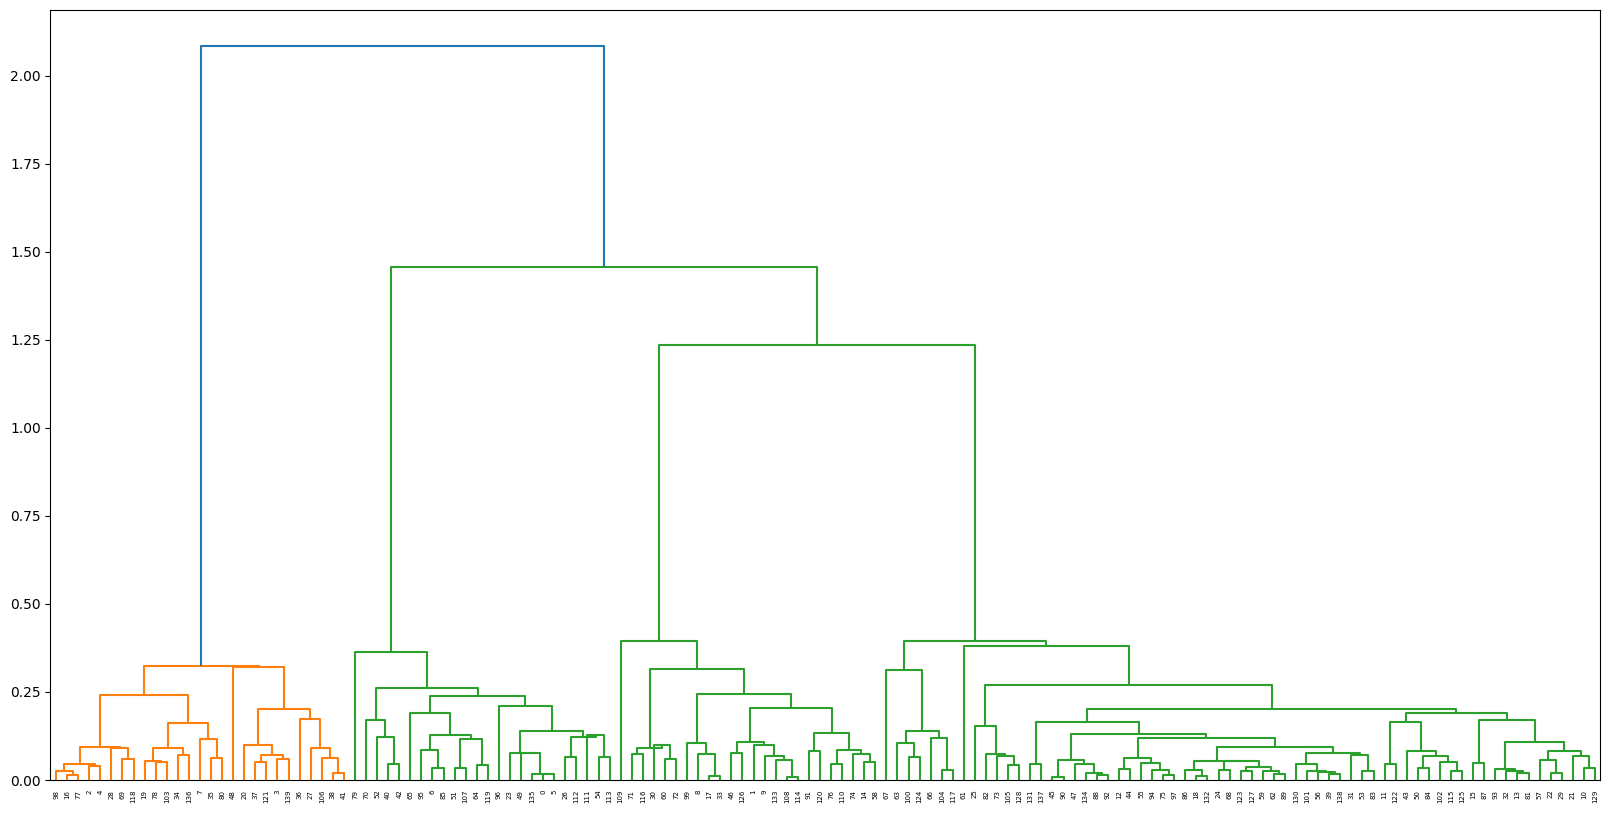

In [93]:
plt.figure(figsize=(20,10))
dendrogram(linkage_data)
plt.show()


* ¿Por qué es necesario normalizar los datos?
    - Para que tenga la misma escala
* ¿Cuántos componentes se usaron y que variables tienen mayor importancia?
    -   2 componentes, la categoria y empatia para los dos componentes
* ¿Qué información da la gráfica "Elbow plot"?
    -   Numero de clusters, la suma de las distancias al centroide
* ¿Crees que los resultados serían diferentes si descartas variables?
    -   Si, porque puede haver diferentes concluciones dependiendo de las variables usadas
* Interpreta por lo menos 2 clusters explicando similitudes o diferencias de personalidad.
    -   Uno son politicos y otros son artistas 
